In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df_airlines_08 = pd.read_csv("airlines_2008.csv")

In [3]:
df_airlines_08.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_airlines_08.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
df_airlines_08.ArrDelay.describe()

count    6.855029e+06
mean     8.168452e+00
std      3.850194e+01
min     -5.190000e+02
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_airlines_08, test_size=0.1, train_size=0.1)

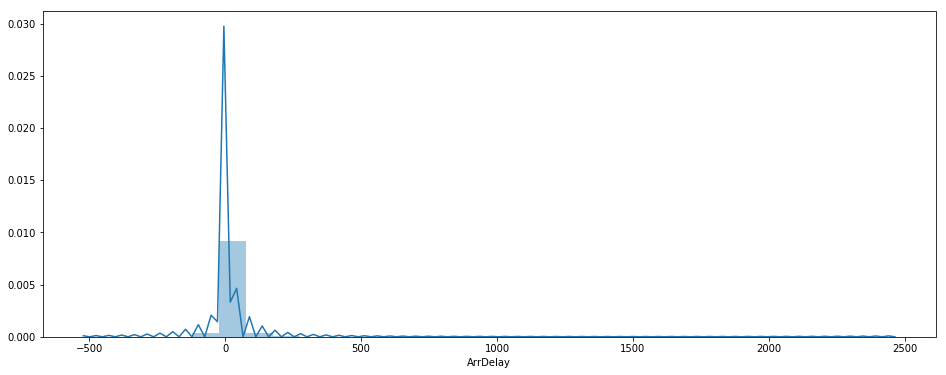

In [7]:
plt.figure(figsize=(16,6))
sns.distplot(df_airlines_08.ArrDelay.dropna(),bins=30)
plt.show()

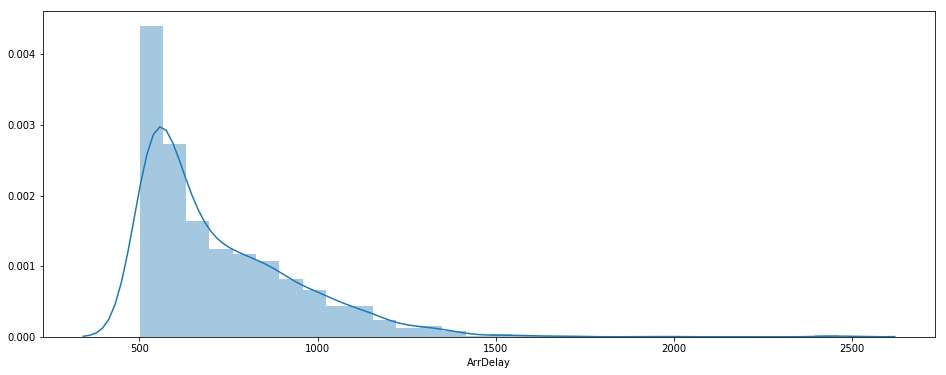

In [8]:
df_outliers = df_airlines_08[df_airlines_08['ArrDelay'] > 500]

plt.figure(figsize=(16,6))
sns.distplot(df_outliers.ArrDelay,bins=30)
plt.show()

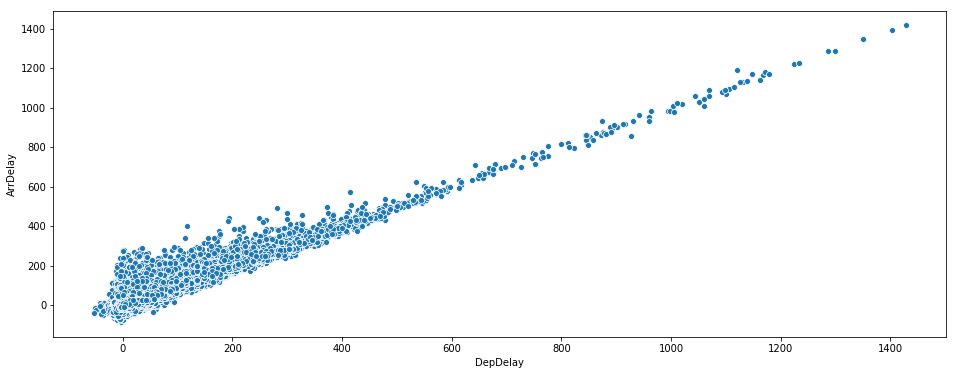

In [9]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='DepDelay',y='ArrDelay',data=df_train)
plt.show()

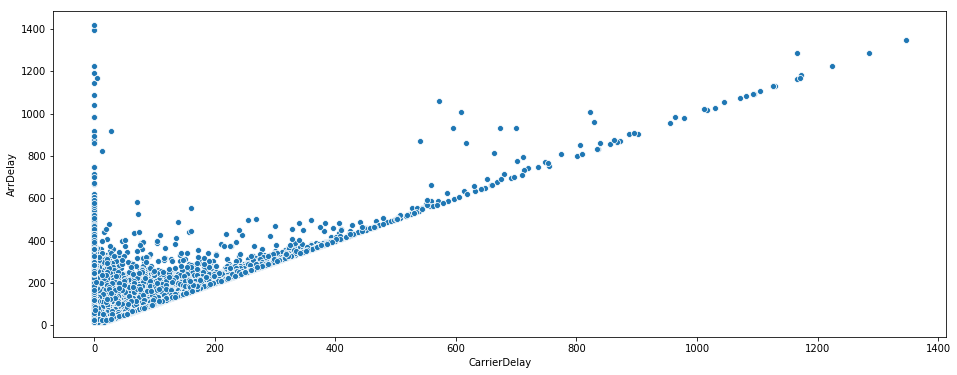

In [10]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='CarrierDelay',y='ArrDelay',data=df_train)
plt.show()

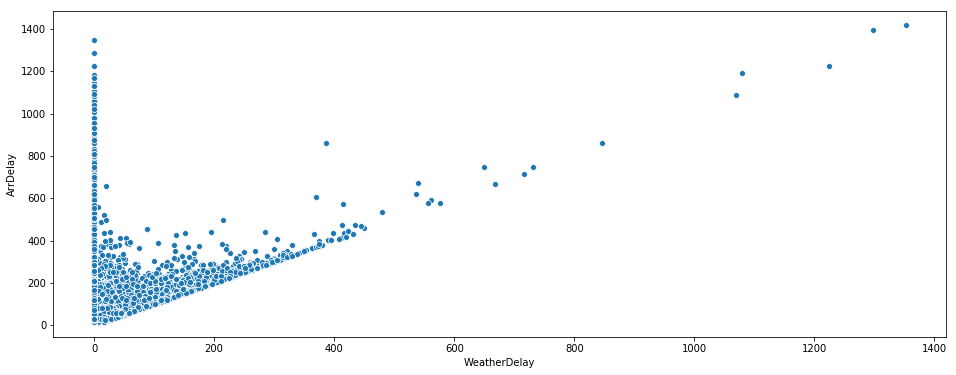

In [11]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='WeatherDelay',y='ArrDelay',data=df_train)
plt.show()

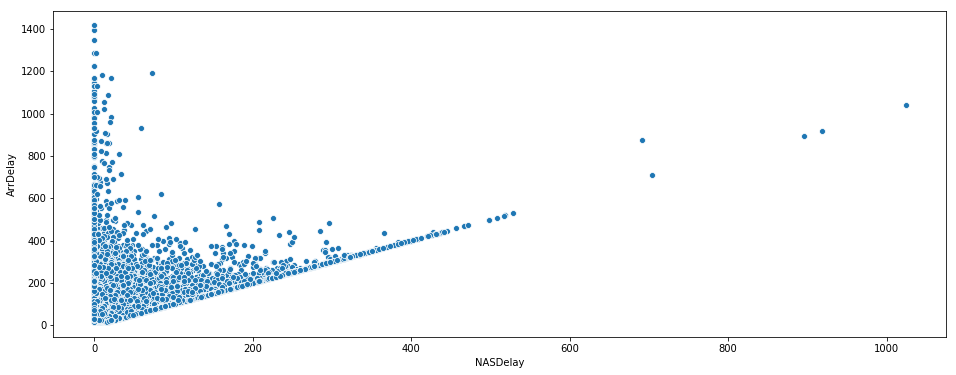

In [12]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='NASDelay',y='ArrDelay',data=df_train)
plt.show()

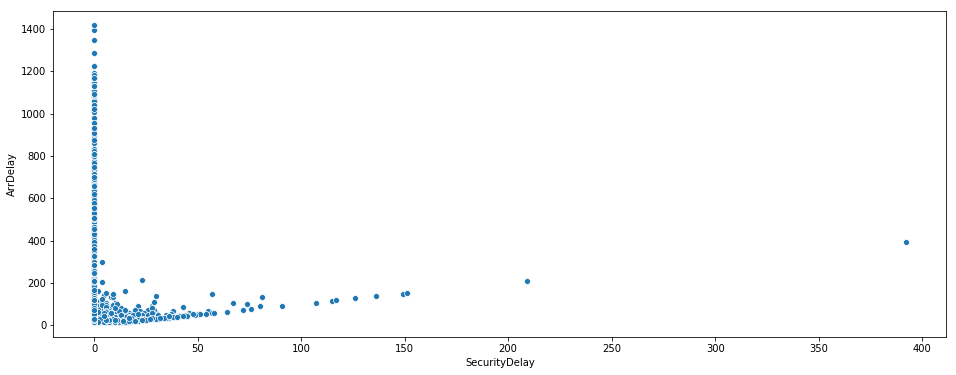

In [13]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='SecurityDelay',y='ArrDelay',data=df_train)
plt.show()

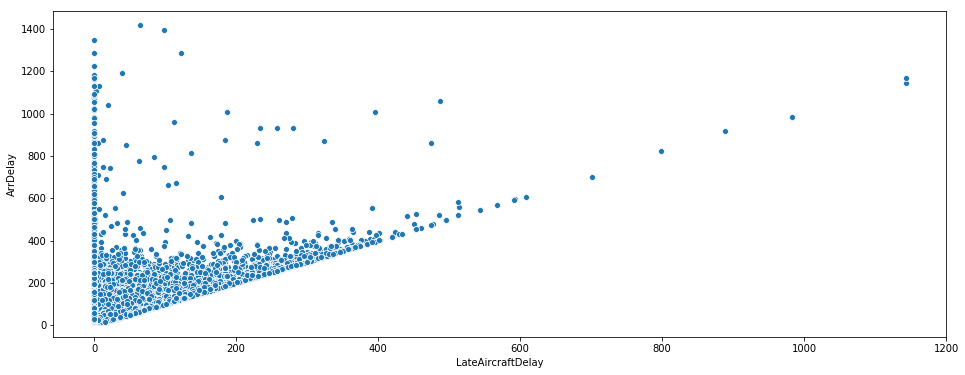

In [14]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='LateAircraftDelay',y='ArrDelay',data=df_train)
plt.show()

In [15]:
df_train['late'] = df_train.ArrDelay.apply(lambda x: np.where(x>=30,1,0))
df_test['late'] = df_test.ArrDelay.apply(lambda x: np.where(x>=30,1,0))

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# replace NANs with 0s
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [49]:
X_train = df_train.drop(['late', 'FlightNum', 'TailNum', 'ArrDelay'], axis=1)
y_train = df_train['late']
X_train = pd.get_dummies(X_train)

In [50]:
X_test = df_test.drop(['late', 'FlightNum', 'TailNum', 'ArrDelay'], axis=1)
y_test = df_test['late']
X_test = pd.get_dummies(X_test)

In [19]:
# add in a column of 0s to match size
# identify the columns to create in the test set from the train set
# do a column check, if we're missing a column, then add a column of 0
# write a pre-process function for the test set

In [20]:
# create function for processing of dataset
def preprocess(x_train, x_test):
    if list(x_test.columns) == list(x_train.columns):
        pass
    else:
        for column in list(x_train.columns):
            if column not in x_test.columns:
                x_test[column] = 0 * x_test.shape[0]

In [21]:
preprocess(X_train,X_test)

In [22]:
X_test = X_test[X_test.columns[X_test.columns.isin(X_train.columns)]]

In [23]:
X_test.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_0,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_D
2751458,2008,5,16,5,1931.0,1652,2228.0,1946,177.0,174.0,...,0,0,0,0,0,1,0,0,0,0
540829,2008,1,18,5,1606.0,1618,1845.0,1900,159.0,162.0,...,0,0,0,0,0,1,0,0,0,0
6224331,2008,11,6,4,1555.0,1601,1708.0,1720,73.0,79.0,...,0,0,0,0,0,1,0,0,0,0
1063353,2008,2,4,1,1554.0,1600,1726.0,1730,152.0,150.0,...,0,0,0,0,0,1,0,0,0,0
4452076,2008,8,30,6,1453.0,1455,1531.0,1540,98.0,105.0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
X_train.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_0,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_D
125272,2008,1,22,2,829.0,820,1012.0,1004,103.0,104.0,...,0,0,0,0,0,1,0,0,0,0
1574577,2008,3,6,4,1336.0,1310,1806.0,1640,210.0,150.0,...,0,0,0,0,0,1,0,0,0,0
530473,2008,1,26,6,1227.0,1235,1254.0,1305,27.0,30.0,...,0,0,0,0,0,1,0,0,0,0
5421155,2008,10,14,2,1804.0,1805,1903.0,1910,59.0,65.0,...,0,0,0,0,0,1,0,0,0,0
376161,2008,1,22,2,1227.0,1235,1257.0,1309,30.0,34.0,...,0,0,0,0,0,1,0,0,0,0


#### Classification

In [84]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [86]:
cross_val_score(rfc, X_test, y_test, cv=5)

array([0.99077713, 0.98973569, 0.99126571, 0.9901066 , 0.9894896 ])

In [87]:
y_pred = rfc.predict(X_test)
f1 = f1_score(y_test,y_pred,average='weighted')

In [88]:
#predict values on test set and then look at roc_auc score
roc = roc_auc_score(y_test,y_pred)

In [89]:
print('f1 score: %.4f' % f1)
print('ROC/AUC score: %.4f' % roc)

f1 score: 0.9908
ROC/AUC score: 0.9704


#### Regression

In [19]:
df_train.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'late'],
      dtype='object')

In [20]:
df_train.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
late                   int64
dtype: object

In [21]:
df_train.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,late
3933232,2008,7,31,4,1825.0,1835,2110.0,2125,DL,1108,...,16.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
2835570,2008,5,8,4,826.0,825,1024.0,1030,NW,1271,...,11.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
4035704,2008,7,4,5,848.0,900,925.0,940,MQ,4455,...,13.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
3635584,2008,7,12,6,714.0,715,1017.0,1030,WN,2232,...,7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
2942410,2008,5,20,2,2105.0,2110,447.0,503,B6,196,...,14.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train['Distance_scaled'] = scaler.fit_transform(df_train[['Distance']])
df_test['Distance_scaled'] = scaler.fit_transform(df_test[['Distance']])

In [23]:
X_train_reg = df_train[['DepDelay', 'Distance_scaled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
y_train_reg = df_train['ArrDelay']

In [24]:
X_test_reg = df_test[['DepDelay', 'Distance_scaled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
y_test_reg = df_test['ArrDelay']

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
lr.score(X_test_reg,y_test_reg)

0.9485251578018032

In [27]:
y_pred_reg = lr.predict(X_test_reg)

In [30]:
from sklearn import metrics

print('Mean Absolute Error: %.1f' % metrics.mean_absolute_error(y_test_reg, y_pred_reg))  
print('Mean Squared Error: %.1f' % metrics.mean_squared_error(y_test_reg, y_pred_reg))  
print('Root Mean Squared Error: %.1f' % np.sqrt(metrics.mean_squared_error(y_test_reg, y_pred_reg))) 

Mean Absolute Error: 6.7
Mean Squared Error: 75.7
Root Mean Squared Error: 8.7


In [31]:
df_test.ArrDelay.describe()

count    700973.000000
mean          8.013721
std          38.340080
min         -91.000000
25%         -10.000000
50%          -2.000000
75%          11.000000
max        1655.000000
Name: ArrDelay, dtype: float64